## Bank Marketing Prediction Model with Logistic Regression

In [251]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid", 
   "management","retired","selfemployed","services","student","technician", "unemployed","unknown")
   
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced     or widowed)
   
   4 - education (categorical:"basic.4y","basic.6y","basic.9y","high.school", "illiterate","professional.course", "university.degree","unknown")
   
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   
   #### related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the          output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also,      after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and    should be discarded if the intention is to have a realistic predictive model.
  
   #### other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last             contact)
  
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999    means client was not previously contacted)
  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
  
  #### social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)   
  
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
  
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  
  20 - nr.employed: number of employees - quarterly indicator (numeric)


In [305]:
df=dataframe= pd.read_csv("archive/bank-additional-full.csv",sep=';')

In [306]:
dataframe.drop(columns=['month','day_of_week','duration','campaign','pdays','previous','poutcome'],inplace=True)
dataframe.shape

(41188, 14)

In [307]:
dataframe.drop_duplicates
dataframe.dropna

<bound method DataFrame.dropna of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact 

In [308]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   emp.var.rate    41188 non-null  float64
 9   cons.price.idx  41188 non-null  float64
 10  cons.conf.idx   41188 non-null  float64
 11  euribor3m       41188 non-null  float64
 12  nr.employed     41188 non-null  float64
 13  y               41188 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 4.4+ MB


Considering all the Catagorical Columns for encoding.
job,marital,education ,default,housing,loan   ,contact,month  ,day_of_week, poutcome      

In [309]:
dataframe.y=dataframe.y.map({'yes':1,'no':0})
data=dataframe

### Checking Correlation

In [265]:
df.marital=df.marital.map({'married':0, 'single':1, 'divorced':2, 'unknown':np.nan})
df.job=df.job.map({'housemaid':0, 'services':1, 'admin.':2, 'blue-collar':3, 'technician':5,
       'retired':6, 'management':7, 'unemployed':8, 'self-employed':9, 'unknown':np.nan,
       'entrepreneur':10, 'student':11})
df.education=df.education.map({'basic.4y':0, 'high.school':1, 'basic.6y':2, 'basic.9y':3,
       'professional.course':4, 'unknown':np.nan, 'university.degree':5,
       'illiterate':6})
df.default=df.default.map({'no':0, 'unknown':np.nan, 'yes':1})
df.housing=df.housing.map({'no':0, 'unknown':np.nan, 'yes':1})
df.loan=df.loan.map({'no':0, 'unknown':np.nan, 'yes':1})
df.contact=df.contact.map({'telephone':0, 'cellular':1})

In [266]:
pd.set_option('display.max_columns', None)
df.sample(3)

,age,job,marital,education,default,housing,loan,contact,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
16419,49,5.0,0.0,4.0,0.0,0.0,0.0,1,1.4,93.918,-42.7,4.963,5228.1,0
8109,24,1.0,1.0,3.0,NaN,0.0,1.0,0,1.4,94.465,-41.8,4.865,5228.1,0
41011,37,0.0,0.0,5.0,0.0,0.0,0.0,1,-1.1,94.601,-49.5,1.025,4963.6,1


<Axes: >

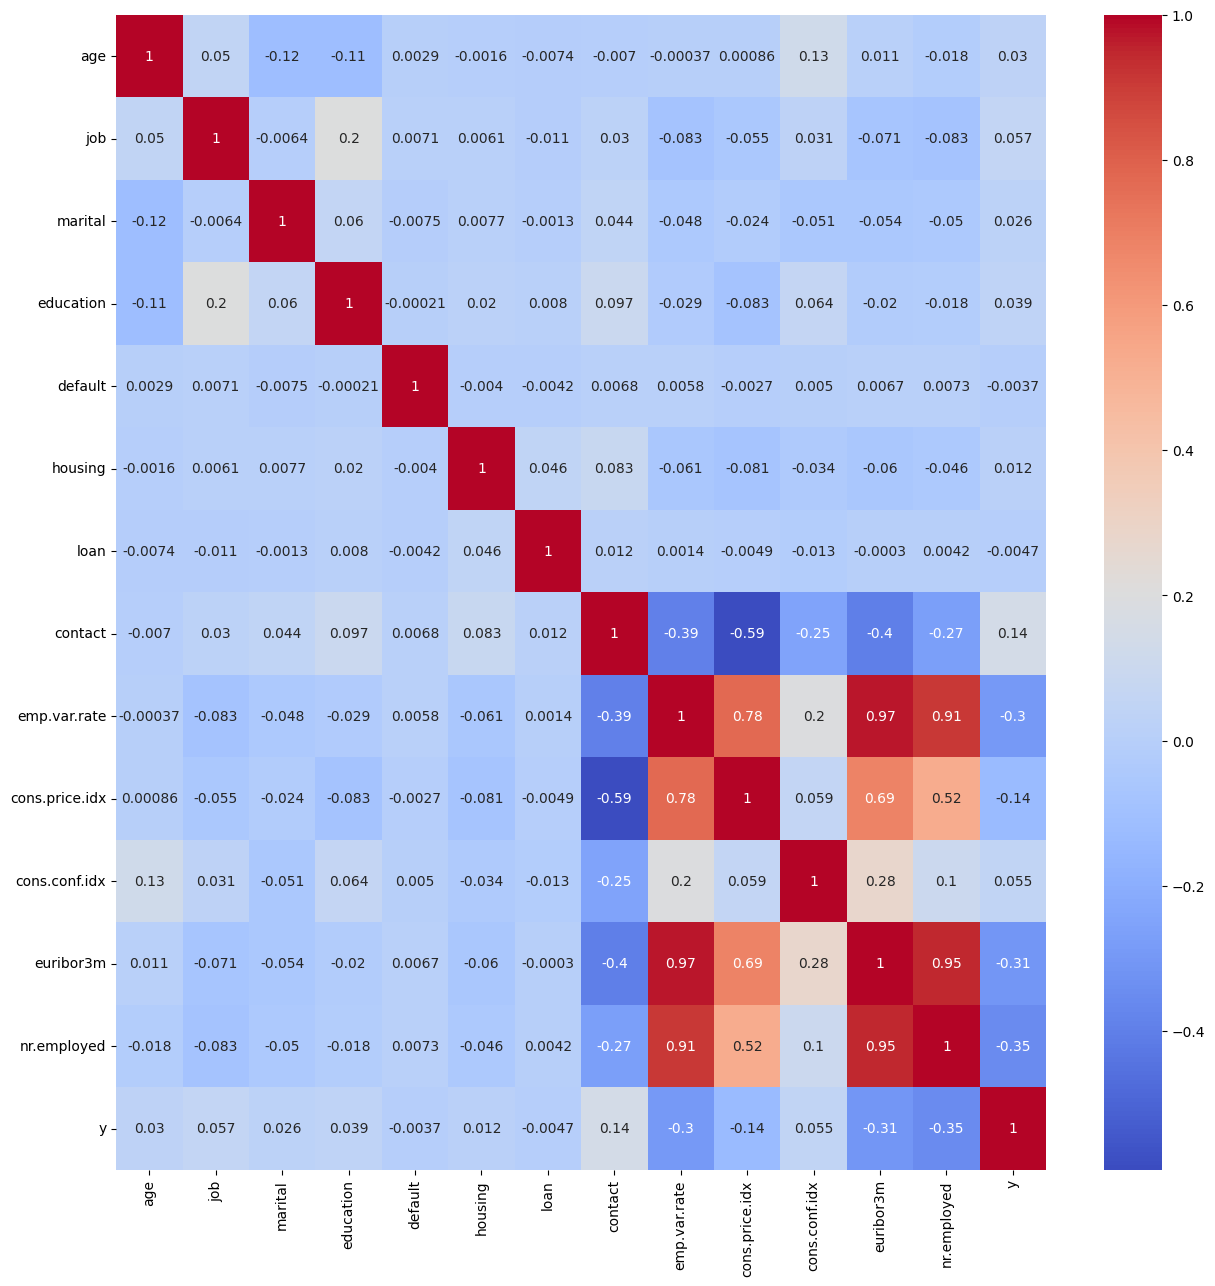

In [267]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

euribor3m,emp.var.rate and number of employees are correlated so including one will opt for better results only.
so keeping number of employees. As duration,campaign,pdays are not very relevent in real life scenario they are excluded.

<Axes: >

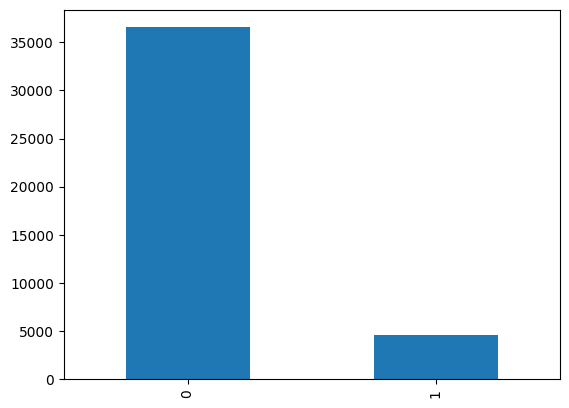

In [268]:
df.y.value_counts().plot(kind='bar')

Dataset is imbalanced

In [327]:
data= data.drop(columns=['euribor3m','emp.var.rate'])

In [311]:
df_y_1=data[data.y==1]
df_y_0=data[data.y==0]
df_y_1_resampled = resample(df_y_1,replace = True,n_samples =df_y_0.shape[0],random_state = 100) 
data = pd.concat([df_y_0,df_y_1_resampled])
data = data.reset_index(drop=True)

### JOB Encoded

In [313]:
oencoder= OneHotEncoder()
oencoder.fit(data[['job']])
columns_=data['job'].unique()
job_encoded=pd.DataFrame(oencoder.transform(data[['job']]).toarray(),columns=columns_)
data= pd.concat([data,job_encoded],axis=1)
data.drop(columns='job',inplace=True)

### Marital status

In [314]:
oencoder2= OneHotEncoder()
oencoder2.fit(data[['marital']])
columns_=data['marital'].unique()
marital_encoded=pd.DataFrame(oencoder2.transform(data[['marital']]).toarray(),columns=columns_)
data= pd.concat([data,marital_encoded],axis=1)
data.drop(columns='marital',inplace=True)

### Education

In [315]:
oencoder3= OneHotEncoder()
oencoder3.fit(data[['education']])
columns_=data['education'].unique()
education_encoded=pd.DataFrame(oencoder3.transform(data[['education']]).toarray(),columns=columns_)
data= pd.concat([data,education_encoded],axis=1)
data.drop(columns='education',inplace=True)

### Defaulted loan

In [317]:
oencoder4= OneHotEncoder()
oencoder4.fit(data[['default']])
default_encoded=pd.DataFrame(oencoder4.transform(data[['default']]).toarray(),columns=['no','d_unknown','yes'])
data= pd.concat([data,default_encoded],axis=1)
data.drop(columns='default',inplace=True)

### Housing

In [318]:
oencoder5= OneHotEncoder()
oencoder5.fit(data[['housing']])
housing_encoded=pd.DataFrame(oencoder5.transform(data[['housing']]).toarray(),columns=['h_yes','h_no','d_unknown'])
data= pd.concat([data,housing_encoded],axis=1)
data.drop(columns='housing',inplace=True)

### Loan

In [319]:
oencoder6= OneHotEncoder()
oencoder6.fit(data[['loan']])
loan_encoded=pd.DataFrame(oencoder6.transform(data[['loan']]).toarray(),columns=['l_no','l_yes','l_unknown'])
data= pd.concat([data,loan_encoded],axis=1)
data.drop(columns='loan',inplace=True)

### Contact

In [320]:
data['contact']=data['contact'].map({'cellular':0,'telephone':1})

### Numerical Data (age,consumer confidence index , number of employees)

#### age

In [328]:
agescaler=MinMaxScaler()
agescaler.fit(data[['age']])
data['age']=agescaler.transform(data[['age']])

#### consumer confidence index - monthly indicator (numeric)

In [329]:
data['cons.conf.idx'].describe()

count    7.309600e+04
mean     1.026504e-16
std      1.000007e+00
min     -1.984654e+00
25%     -4.693453e-01
50%     -3.009776e-01
75%      7.092281e-01
max      2.486442e+00
Name: cons.conf.idx, dtype: float64

In [330]:
indscaler=StandardScaler()
indscaler.fit(data[['cons.conf.idx']])
data['cons.conf.idx']=indscaler.transform(data[['cons.conf.idx']])

#### Number of employed

<Axes: ylabel='Density'>

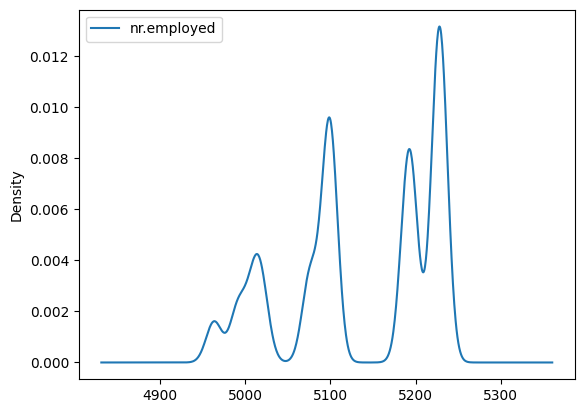

In [331]:
data[['nr.employed']].plot(kind='kde')

In [332]:
empscaler=StandardScaler()
empscaler.fit(data[['nr.employed']])
data['nr.employed']=empscaler.transform(data[['nr.employed']])

### Splitting data

In [333]:
feature=data.drop(columns='y')
result=data['y']

In [334]:
X_train,X_test,y_train,y_test=train_test_split(feature,result,test_size = .25)

In [335]:
X_train.shape

(54822, 38)

### Model Training

In [337]:
model = RandomForestClassifier()

# Fit the classifier to the data
model.fit(X_train, y_train)

RandomForestClassifier()

In [338]:
y_pred=model.predict(X_test)

### Model Accuracy with Test set

In [345]:

score= accuracy_score(y_pred=y_pred,y_true=y_test)
print('accurcy of the model on test set is :', score)

accurcy of the model on test set is : 0.913921418408668


### Which feature Impacts the output most?

In [340]:
model.feature_importances_

array([3.49111156e-01, 3.33907442e-02, 7.62902833e-02, 7.97190188e-02,
       1.49162830e-01, 1.55551500e-02, 1.31035857e-02, 7.48901815e-03,
       5.06679742e-03, 9.51021374e-03, 6.94229519e-03, 7.35184441e-03,
       9.96383001e-03, 6.35951628e-03, 1.34829454e-02, 6.32705055e-03,
       2.43486617e-03, 1.05703050e-02, 1.44224322e-02, 1.22289238e-02,
       9.20767782e-04, 8.85795881e-03, 8.20232184e-03, 1.26012531e-02,
       1.49265775e-02, 4.03013621e-04, 1.21352635e-02, 1.37111864e-02,
       7.57821507e-03, 1.09333238e-02, 1.21852399e-02, 1.24668796e-05,
       1.78203217e-02, 2.41960986e-03, 1.74302880e-02, 1.47101837e-02,
       2.51999146e-03, 1.41492103e-02])

In [341]:
weights= abs(model.feature_importances_)

In [342]:
featues_weights=pd.DataFrame([weights],columns=(X_train.columns))

In [343]:
featues_weights.sort_values(by=0,axis=1,ascending=False)

,age,nr.employed,cons.conf.idx,cons.price.idx,contact,h_yes,d_unknown,housemaid,basic.9y,l_no,single,l_unknown,university.degree,unknown,services,basic.6y,divorced,d_unknown,unknown,no,married,unemployed,technician,basic.4y,high.school,illiterate,admin.,management,retired,self-employed,entrepreneur,blue-collar,l_yes,student,h_no,unknown,professional.course,yes
0,0.349111,0.149163,0.079719,0.07629,0.033391,0.01782,0.01743,0.015555,0.014927,0.01471,0.014422,0.014149,0.013711,0.013483,0.013104,0.012601,0.012229,0.012185,0.012135,0.010933,0.01057,0.009964,0.00951,0.008858,0.008202,0.007578,0.007489,0.007352,0.006942,0.00636,0.006327,0.005067,0.00252,0.002435,0.00242,0.000921,0.000403,0.000012


#### Most Impacting Features are Age,Number of Employees,Consumer confidence index

In [ ]:
!git init